In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [3]:
labels = ['csk', 'dc', 'gt', 'ipl', 'kkr', 'lsg', 'mi', 'pbks', 'rcb', 'rr', 'srh']
img_size = 90
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            if img.endswith('png'):
              img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
              resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
              data.append([resized_arr, class_num])
    return np.array(data)

In [4]:
!unzip ./drive/MyDrive/ipl-assets/upload.zip -d ./drive/MyDrive/ipl-assets/

Archive:  ./drive/MyDrive/ipl-assets/upload.zip
   creating: ./drive/MyDrive/ipl-assets/train/
   creating: ./drive/MyDrive/ipl-assets/train/csk/
 extracting: ./drive/MyDrive/ipl-assets/train/csk/result10.png  
 extracting: ./drive/MyDrive/ipl-assets/train/csk/result11.png  
 extracting: ./drive/MyDrive/ipl-assets/train/csk/result119.png  
 extracting: ./drive/MyDrive/ipl-assets/train/csk/result12 (2).png  
 extracting: ./drive/MyDrive/ipl-assets/train/csk/result12.png  
 extracting: ./drive/MyDrive/ipl-assets/train/csk/result120.png  
 extracting: ./drive/MyDrive/ipl-assets/train/csk/result121.png  
 extracting: ./drive/MyDrive/ipl-assets/train/csk/result122.png  
 extracting: ./drive/MyDrive/ipl-assets/train/csk/result123.png  
 extracting: ./drive/MyDrive/ipl-assets/train/csk/result124.png  
 extracting: ./drive/MyDrive/ipl-assets/train/csk/result125.png  
 extracting: ./drive/MyDrive/ipl-assets/train/csk/result126.png  
 extracting: ./drive/MyDrive/ipl-assets/train/csk/result127.pn

In [5]:
train = get_data('./drive/MyDrive/ipl-assets/train')
val = get_data('./drive/MyDrive/ipl-assets/test')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  del sys.path[0]


In [6]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [7]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [8]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(img_size,img_size,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(len(labels), activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 90, 90, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 45, 45, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 11, 11, 64)       0

In [9]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:
history = model.fit(x_train,y_train,epochs = 500 , validation_data = (x_val, y_val))

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


42/42 [==============================] - 16s 360ms/step - loss: 2.4074 - accuracy: 0.0803 - val_loss: 2.4029 - val_accuracy: 0.0545
Epoch 2/500
42/42 [==============================] - 15s 358ms/step - loss: 2.3994 - accuracy: 0.0750 - val_loss: 2.3966 - val_accuracy: 0.0606
Epoch 3/500
42/42 [==============================] - 15s 356ms/step - loss: 2.3983 - accuracy: 0.0947 - val_loss: 2.3905 - val_accuracy: 0.0848
Epoch 4/500
42/42 [==============================] - 17s 404ms/step - loss: 2.3882 - accuracy: 0.0879 - val_loss: 2.3846 - val_accuracy: 0.1030
Epoch 5/500
42/42 [==============================] - 15s 354ms/step - loss: 2.3815 - accuracy: 0.1098 - val_loss: 2.3784 - val_accuracy: 0.1152
Epoch 6/500
42/42 [==============================] - 15s 361ms/step - loss: 2.3818 - accuracy: 0.1212 - val_loss: 2.3723 - val_accuracy: 0.1667
Epoch 7/500
42/42 [==============================] - 15s 364ms/step - loss: 2.3741 - accuracy: 0.1152 - val_loss: 2.3659 - val_accuracy: 0.1848
Epoc

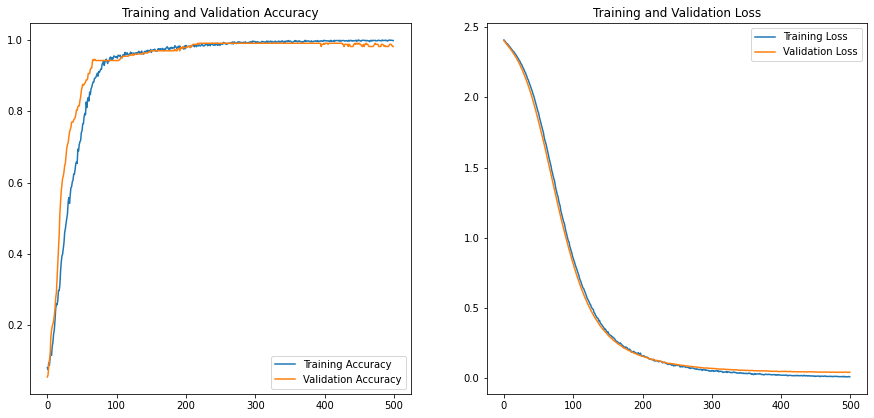

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [12]:
model.save('./drive/MyDrive/ipl_model')

INFO:tensorflow:Assets written to: ./drive/MyDrive/ipl_model/assets


In [13]:
predictions = model.predict(x_val)
predictions

array([[9.9980992e-01, 9.2635338e-07, 4.1099765e-06, ..., 4.7658291e-06,
        3.8343791e-05, 3.9323263e-07],
       [9.9972504e-01, 1.3467081e-06, 6.3674293e-06, ..., 6.9152734e-06,
        4.6653553e-05, 5.4547689e-07],
       [9.6091664e-01, 1.4275159e-03, 2.2199720e-03, ..., 3.1379077e-03,
        1.3195038e-02, 4.4675416e-04],
       ...,
       [9.3409392e-07, 5.8555486e-07, 1.8684856e-05, ..., 5.2883576e-07,
        1.3791701e-09, 9.9985039e-01],
       [7.9025358e-07, 6.6316812e-07, 2.3111605e-05, ..., 4.6075482e-07,
        1.5742823e-09, 9.9984360e-01],
       [1.2579906e-06, 1.2249401e-06, 2.6526657e-05, ..., 1.2583229e-06,
        4.1000776e-09, 9.9913990e-01]], dtype=float32)